# Project: Multinomial Naïve Bayes Classifier - the YouTube Dataset

### Introducing the database

The database is taken from http://archive.ics.uci.edu/dataset/380/youtube+spam+collection

### Importing the necessary libraries

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import glob

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

### Reading the database

In [9]:
# List CSV files in the Colab environment
files = glob.glob('Youtube*.csv')
files

['Youtube01.csv',
 'Youtube02.csv',
 'Youtube05.csv',
 'Youtube04.csv',
 'Youtube03.csv']

In [15]:
all_df = [] # Create an empty list to store the DataFrames

# Read the CSV file, drop specified columns, and append the resulting DataFrame to 'all_df'
for i in files:
  all_df.append(pd.read_csv(i).drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis=1))

In [16]:
# Retrieve the first element from the all_df list
all_df[0]

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
344,How can this have 2 billion views when there's...,0
345,I don't now why I'm watching this in 2014﻿,0
346,subscribe to me for call of duty vids and give...,1
347,hi guys please my android photo editor downloa...,1


In [17]:
# Concatenate all DataFrames in 'all_df' vertically, ignoring the original index, and assign the result to 'data'
data = pd.concat(all_df, axis=0, ignore_index=True)
data

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
1950,Like this comment for no reason﻿,1
1951,love this song﻿,0
1952,this song is awesome. these guys are the best....,1
1953,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿,1


In [18]:
# Calculate the sum of null values for each column in the data
data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [19]:
# Count the occurrences of each unique value in the 'CLASS' column of the data
data['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

CLASS 1 corresponds to spam and CLASS 0 to ham comments. The dataset is balanced which is a good thing for our Naive Baye's classifier that we will use.

### Defining the inputs and the target. Creating the train-test split.

In [22]:
# Assign the 'CONTENT' column of the data to the variable inputs, and the 'CLASS' column to the variable target.
inputs = data['CONTENT']
target = data['CLASS']

In [23]:
# Split the inputs and target data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42, stratify=target)

In [24]:
# Calculate the normalized value counts of each unique value in the y_train Series
y_train.value_counts(normalize=True)

1    0.513427
0    0.486573
Name: CLASS, dtype: float64

In [25]:
# Calculate the normalized value counts of each unique value in the y_test Series
y_test.value_counts(normalize=True)

1    0.514066
0    0.485934
Name: CLASS, dtype: float64

### Tokenizing the YouTube comments

In [26]:
# Create an instance of the CountVectorizer class
vectorizer= CountVectorizer()

In [27]:
# Fit the vectorizer to the training data and transforms the training data into a matrix of token counts.
# Then transform the test data into a matrix of token counts using the same vocabulary learned from the training data.
X_train_transf = vectorizer.fit_transform(X_train)
X_test_transf = vectorizer.transform(X_test)

In [28]:
# Convert the sparse matrix X_train_transf into a dense array representation.
X_train_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
X_train_transf.shape

(1564, 3907)

In [30]:
X_test_transf.shape

(391, 3907)

### Performing the classification

In [32]:
# Create an instance of the MultinomialNB class
clf = MultinomialNB()

In [33]:
# Train the clf classifier using the training data X_train_transf and the corresponding labels y_train.
clf.fit(X_train_transf, y_train)

MultinomialNB()

### Performing the evaluation on the test dataset

In [34]:
# Use the trained classifier clf to make predictions on the test data X_test_transf.
y_test_pred= clf.predict(X_test_transf)

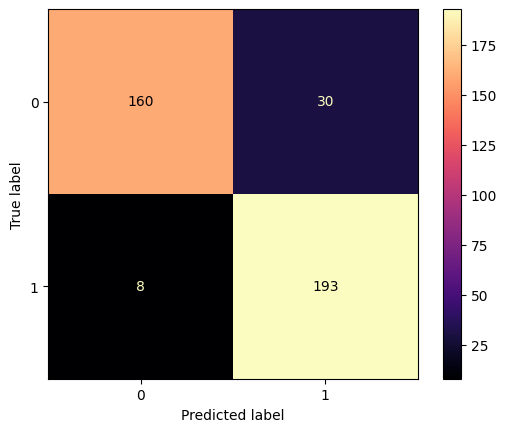

In [38]:
# Create a confusion matrix display based on the predicted labels y_test_pred and the true labels y_test.
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, labels=clf.classes_, cmap='magma')
plt.show()

In [39]:
# Print a classification report based on the predicted labels y_test_pred and the true labels y_test.
print(classification_report(y_test, y_test_pred, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.95      0.84      0.89       190
        Spam       0.87      0.96      0.91       201

    accuracy                           0.90       391
   macro avg       0.91      0.90      0.90       391
weighted avg       0.91      0.90      0.90       391



### Creating probability-distribution figures

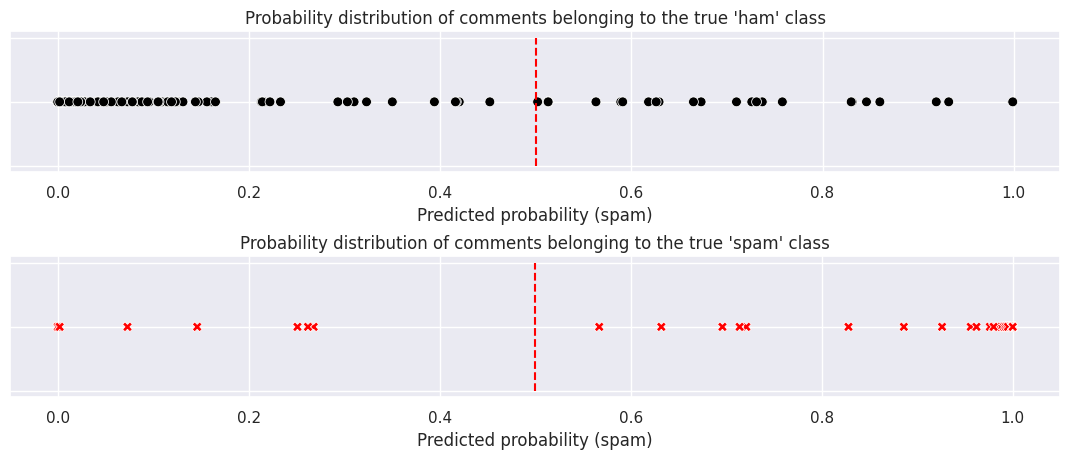

In [41]:
# Create a scatter plot to visualize the predicted probabilities of comments belonging to different classes.
spam_proba = clf.predict_proba(X_test_transf).round(3)[:,1];

df_scatter = pd.DataFrame()

df_scatter['True class'] = y_test
df_scatter['Predicted class'] = y_test_pred
df_scatter['Predicted probability (spam)'] = spam_proba

df_scatter = df_scatter.reset_index(drop = True)

palette_0 = sns.color_palette(['#000000'])
palette_1 = sns.color_palette(['#FF0000'])

df_scatter_0 = df_scatter[df_scatter['True class'] == 0].reset_index(drop = True)
df_scatter_1 = df_scatter[df_scatter['True class'] == 1].reset_index(drop = True)

sns.set()

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,5))
fig.tight_layout(pad = 3)

sns.scatterplot(x = 'Predicted probability (spam)',
                y = np.zeros(df_scatter_0.shape[0]),
                data = df_scatter_0,
                hue = 'True class',
                s = 50,
                markers = ['o'],
                palette = palette_0,
                style = 'True class',
                legend = False,
                ax = ax1).set(yticklabels=[])

ax1.set_title('Probability distribution of comments belonging to the true \'ham\' class')
ax1.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');


sns.scatterplot(x = 'Predicted probability (spam)',
                y = np.zeros(df_scatter_1.shape[0]),
                hue = 'True class',
                data = df_scatter_1,
                s = 50,
                palette = palette_1,
                markers = ['X'],
                style = 'True class',
                legend = False,
                ax = ax2).set(yticklabels=[])

ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')

ax2.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

### Making predictions

In [42]:
predict_data = vectorizer.transform(['This song is amazing!',
                                     'You can win 1m dollars right now, just click here!!!'])

In [43]:
clf.predict(predict_data)

array([0, 1])

## Creating better model 2

In [54]:
# Create an instance of the MultinomialNB class
clf2 = ComplementNB()

In [55]:
# Train the clf classifier using the training data X_train_transf and the corresponding labels y_train.
clf2.fit(X_train_transf, y_train)

ComplementNB()

In [56]:
# Use the trained classifier clf to make predictions on the test data X_test_transf.
y_test_pred= clf2.predict(X_test_transf)

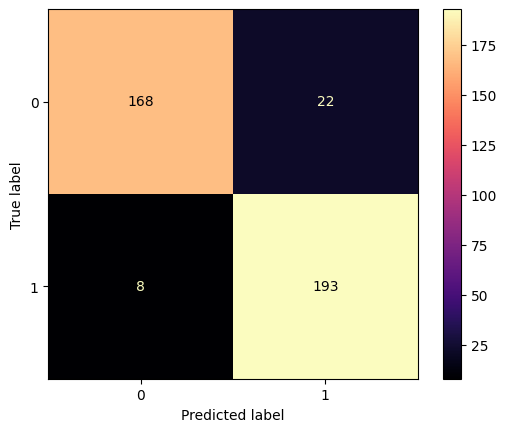

In [60]:
sns.reset_orig()

# Create a confusion matrix display based on the predicted labels y_test_pred and the true labels y_test.
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, labels=clf2.classes_, cmap='magma')
plt.show()

In [58]:
# Print a classification report based on the predicted labels y_test_pred and the true labels y_test.
print(classification_report(y_test, y_test_pred, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.95      0.88      0.92       190
        Spam       0.90      0.96      0.93       201

    accuracy                           0.92       391
   macro avg       0.93      0.92      0.92       391
weighted avg       0.93      0.92      0.92       391



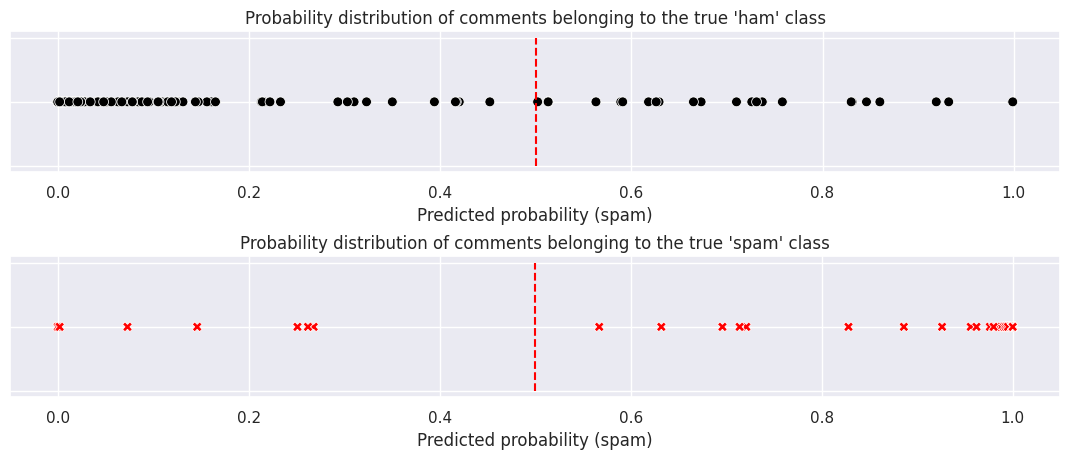

In [59]:
# Create a scatter plot to visualize the predicted probabilities of comments belonging to different classes.
spam_proba = clf2.predict_proba(X_test_transf).round(3)[:,1];

df_scatter2 = pd.DataFrame()

df_scatter2['True class'] = y_test
df_scatter2['Predicted class'] = y_test_pred
df_scatter2['Predicted probability (spam)'] = spam_proba

df_scatter2 = df_scatter2.reset_index(drop = True)

palette_0 = sns.color_palette(['#000000'])
palette_1 = sns.color_palette(['#FF0000'])

df_scatter_0_2 = df_scatter2[df_scatter2['True class'] == 0].reset_index(drop = True)
df_scatter_1_2 = df_scatter2[df_scatter2['True class'] == 1].reset_index(drop = True)

sns.set()

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,5))
fig.tight_layout(pad = 3)

sns.scatterplot(x = 'Predicted probability (spam)',
                y = np.zeros(df_scatter_0_2.shape[0]),
                data = df_scatter_0_2,
                hue = 'True class',
                s = 50,
                markers = ['o'],
                palette = palette_0,
                style = 'True class',
                legend = False,
                ax = ax1).set(yticklabels=[])

ax1.set_title('Probability distribution of comments belonging to the true \'ham\' class')
ax1.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');


sns.scatterplot(x = 'Predicted probability (spam)',
                y = np.zeros(df_scatter_1_2.shape[0]),
                hue = 'True class',
                data = df_scatter_1_2,
                s = 50,
                palette = palette_1,
                markers = ['X'],
                style = 'True class',
                legend = False,
                ax = ax2).set(yticklabels=[])

ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')

ax2.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

## Creating better model 3

In [61]:
# Create an instance of the MultinomialNB class
clf3 = MultinomialNB(class_prior=np.array([0.6, 0.4]))

In [62]:
# Train the clf classifier using the training data X_train_transf and the corresponding labels y_train.
clf3.fit(X_train_transf, y_train)

MultinomialNB(class_prior=array([0.6, 0.4]))

In [63]:
# Use the trained classifier clf to make predictions on the test data X_test_transf.
y_test_pred= clf3.predict(X_test_transf)

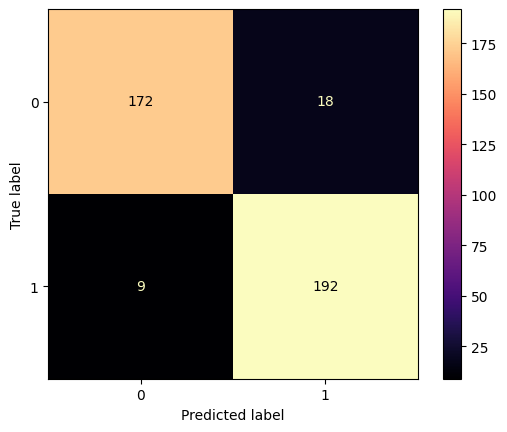

In [64]:
sns.reset_orig()

# Create a confusion matrix display based on the predicted labels y_test_pred and the true labels y_test.
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, labels=clf3.classes_, cmap='magma')
plt.show()

In [65]:
# Print a classification report based on the predicted labels y_test_pred and the true labels y_test.
print(classification_report(y_test, y_test_pred, target_names=['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.95      0.91      0.93       190
        Spam       0.91      0.96      0.93       201

    accuracy                           0.93       391
   macro avg       0.93      0.93      0.93       391
weighted avg       0.93      0.93      0.93       391



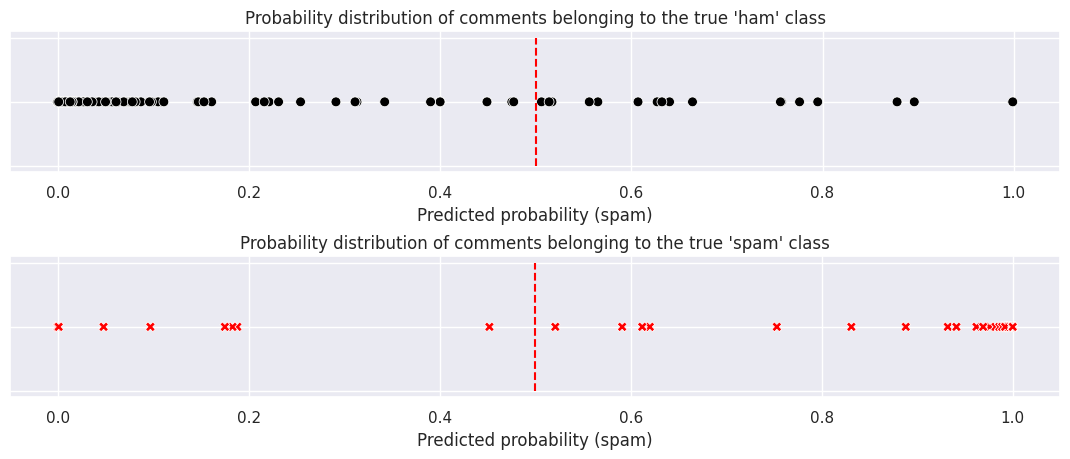

In [68]:
# Create a scatter plot to visualize the predicted probabilities of comments belonging to different classes.
spam_proba = clf3.predict_proba(X_test_transf).round(3)[:,1];

df_scatter3 = pd.DataFrame()

df_scatter3['True class'] = y_test
df_scatter3['Predicted class'] = y_test_pred
df_scatter3['Predicted probability (spam)'] = spam_proba

df_scatter3 = df_scatter3.reset_index(drop = True)

palette_0 = sns.color_palette(['#000000'])
palette_1 = sns.color_palette(['#FF0000'])

df_scatter_0_3 = df_scatter3[df_scatter3['True class'] == 0].reset_index(drop = True)
df_scatter_1_3 = df_scatter3[df_scatter3['True class'] == 1].reset_index(drop = True)

sns.set()

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,5))
fig.tight_layout(pad = 3)

sns.scatterplot(x = 'Predicted probability (spam)',
                y = np.zeros(df_scatter_0_3.shape[0]),
                data = df_scatter_0_3,
                hue = 'True class',
                s = 50,
                markers = ['o'],
                palette = palette_0,
                style = 'True class',
                legend = False,
                ax = ax1).set(yticklabels=[])

ax1.set_title('Probability distribution of comments belonging to the true \'ham\' class')
ax1.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');


sns.scatterplot(x = 'Predicted probability (spam)',
                y = np.zeros(df_scatter_1_3.shape[0]),
                hue = 'True class',
                data = df_scatter_1_3,
                s = 50,
                palette = palette_1,
                markers = ['X'],
                style = 'True class',
                legend = False,
                ax = ax2).set(yticklabels=[])

ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')

ax2.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');